# Creating and Visualizing DataFrames

Outline
- [1 Visualizing your data](#vis-data)
- [&nbsp;&nbsp; 1.1 Which avocado size is most popular?](#avo-pop)
- [&nbsp;&nbsp; 1.2 Changes in sales overtime](#chg-sales)
- [&nbsp;&nbsp; 1.3 Avocado supply and demand](#avo-sup-dem)
- [&nbsp;&nbsp; 1.4 Price of conventional vs. organic avocados](#price-conv-vs-org-avo)
- [2 Missing values](#mis-vals)
- [&nbsp;&nbsp; 2.1 Finding missing values](#f-mis-vals)
- [&nbsp;&nbsp; 2.2 Removing missing values](#rm-mis-vals)
- [&nbsp;&nbsp; 2.3 Replacing missing values](#rp-mis-vals)
- [3 Creating DataFrames](#crt-df)
- [&nbsp;&nbsp; 3.1 List of dictionaries](#ls-dic)
- [&nbsp;&nbsp; 3.2 Dictionary of lists](#dic-ls)
- [4 Reading and writing DataFrames](#rw-df)
- [&nbsp;&nbsp; 4.1 CSV to DataFrame](#csv-df)
- [&nbsp;&nbsp; 4.2 DataFrame to CSV](#df-csv)

<a id="vis-data"></a>
# 1 Visualizing your data
<!-- %%HTML -->
<div align="middle">
<video width="60%" controls>
      <source src="./../../res/videos/4.creating-visualizing-dataframes/1.visualizing_your_data.mp4" type="video/mp4">
</video></div>

<a id="avo-pop"></a>
## 1.1 Which avocado size is most popular?
Avocados are increasingly popular and delicious in guacamole and on toast. The Hass Avocado Board keeps track of avocado supply and demand across the USA, including the sales of three different sizes of avocado. In this exercise, you'll use a bar plot to figure out which size is the most popular.

Bar plots are great for revealing relationships between categorical (size) and numeric (number sold) variables, but you'll often have to manipulate your data first in order to get the numbers you need for plotting.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
avocados = pd.read_pickle("./../../data/avoplotto.pkl")

Print the head of the avocados dataset. What columns are available?

In [5]:
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


For each avocado size group, calculate the total number sold, storing as nb_sold_by_size.

In [12]:
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()
nb_sold_by_size

size
extra_large    1.561752e+08
large          2.015012e+09
small          2.054936e+09
Name: nb_sold, dtype: float64

Create a bar plot of the number of avocados sold by size.

<Axes: xlabel='size'>

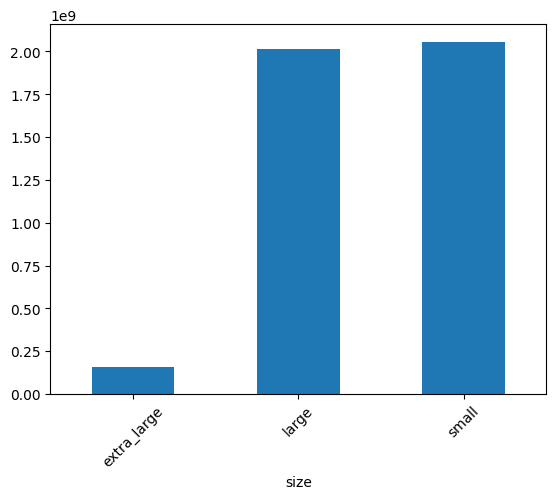

In [16]:
nb_sold_by_size.plot(kind="bar", rot=45)

Show the plot.

In [18]:
plt.show()

<a id="chg-sales"></a>
## 1.2 Changes in sales overtime
Line plots are designed to visualize the relationship between two numeric variables, where each data values is connected to the next one. They are especially useful for visualizing the change in a number over time since each time point is naturally connected to the next time point. In this exercise, you'll visualize the change in avocado sales over three years.

Get the total number of avocados sold on each date. The DataFrame has two rows for each date—one for organic, and one for conventional. Save this as nb_sold_by_date.

In [23]:
nb_sold_by_date = avocados.groupby("date")["nb_sold"].sum()
nb_sold_by_date

date
2015-01-04    27279606.03
2015-01-11    25081927.33
2015-01-18    24961540.48
2015-01-25    24094678.66
2015-02-01    39838734.08
                 ...     
2018-02-25    25434002.74
2018-03-04    26834303.05
2018-03-11    26094044.41
2018-03-18    26030618.97
2018-03-25    27480242.92
Name: nb_sold, Length: 169, dtype: float64

Create a line plot of the number of avocados sold.

<Axes: xlabel='date'>

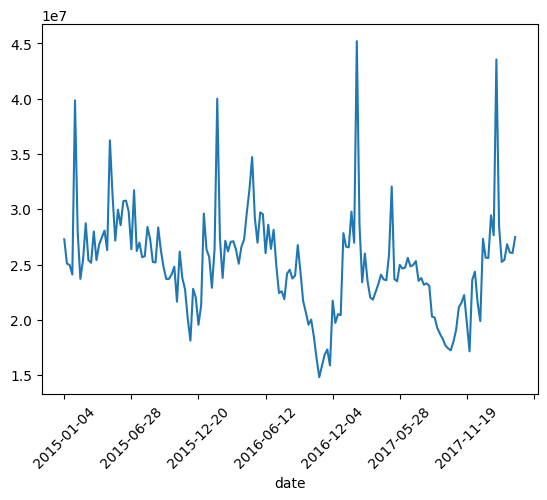

In [26]:
nb_sold_by_date.plot(kind="line", rot=45)

Show the plot.

In [27]:
plt.show()

<a id="avo-sup-dem"></a>
## 1.3 Avocado supply and demand
Scatter plots are ideal for visualizing relationships between numerical variables. In this exercise, you'll compare the number of avocados sold to average price and see if they're at all related. If they're related, you may be able to use one number to predict the other.

Create a scatter plot with nb_sold on the x-axis and avg_price on the y-axis. Title it "Number of avocados sold vs. average price".

<Axes: title={'center': 'Number of avocados sold vs. average price'}, xlabel='nb_sold', ylabel='avg_price'>

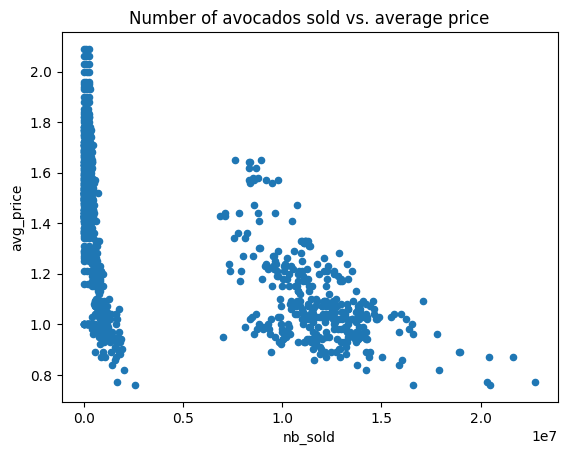

In [41]:
avocados.plot(kind="scatter", x="nb_sold", y="avg_price", title="Number of avocados sold vs. average price",
              xlabel="nb_sold", ylabel="avg_price")

Show the plot.

In [38]:
plt.show()

<a id="price-conv-vs-org-avo"></a>
## 1.4 Price of conventional vs. organic avocados
Creating multiple plots for different subsets of data allows you to compare groups. In this exercise, you'll create multiple histograms to compare the prices of conventional and organic avocados.

Subset avocados for the conventional type, and the average price column. Create a histogram.<br>
The transparency of both histograms should be 0.5 to see how much overlap there is between the two distributions.
Use 20 bins in both histograms.

<Axes: >

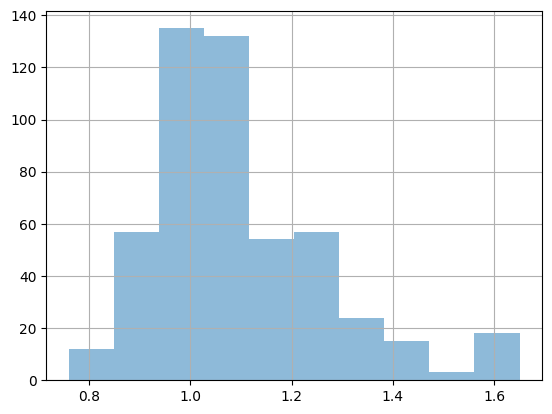

In [57]:
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5)

Create a histogram of avg_price for organic type avocados.

<Axes: >

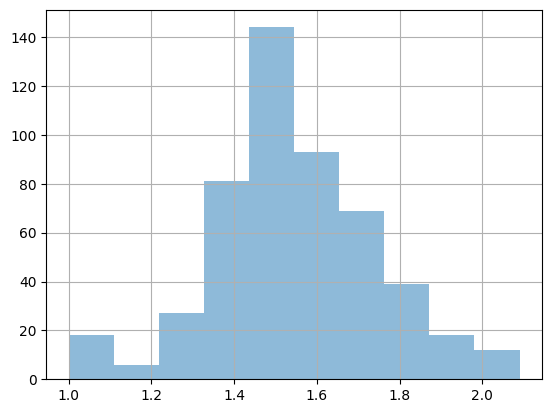

In [56]:
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5)

Add a legend to your plot, with the names "conventional" and "organic".

/tmp/ipykernel_36877/1123587810.py:1: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend("conventional", "organic")


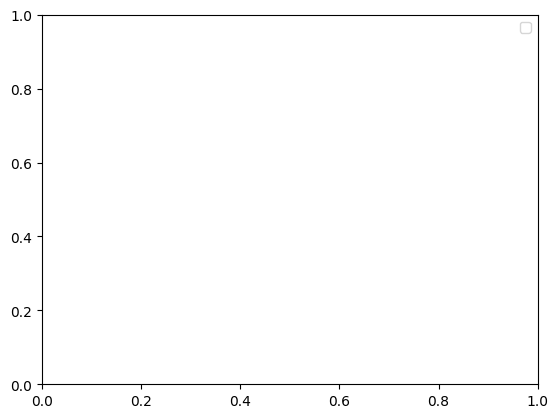

In [50]:
plt.legend(["conventional", "organic"])


Show your plot.

In [51]:
plt.show()

<a id="mis-vals"></a>
# 2 Missing values
<div align="middle">
<video width="60%" controls>
      <source src="./../../res/videos/4.creating-visualizing-dataframes/2.missing_values.mp4" type="video/mp4">
</video></div>

<a id="f-mis-vals"></a>
## 2.1 Finding missing values
Missing values are everywhere, and you don't want them interfering with your work. Some functions ignore missing data by default, but that's not always the behavior you might want. Some functions can't handle missing values at all, so these values need to be taken care of before you can use them. If you don't know where your missing values are, or if they exist, you could make mistakes in your analysis. In this exercise, you'll determine if there are missing values in the dataset, and if so, how many.

avocados_2016, a subset of avocados that contains only sales from 2016.

In [215]:
from numpy import nan

def delete_some_avocados(df):
    stop:int = len(df.index)
    steps = np.random.randint(1, (stop // 10))
    for i in range(0, stop, steps):
        # between type and nb_sold col, don't set date NaN
        del_col:int = np.random.randint(1, 5)
        df.iloc[i, del_col] = nan # or np.nan or None or pd.NA
        steps = np.random.randint(1, stop)

In [216]:
avocados_2016 = avocados[avocados["year"] == 2016]

delete_some_avocados(avocados_2016)

Print a DataFrame that shows whether each value in avocados_2016 is missing or not.

In [213]:
avocados_2016.isna()

,date,type,year,avg_price,size,nb_sold
52,False,False,False,True,False,False
53,False,False,False,False,False,False
54,False,False,False,False,False,False
55,False,False,False,False,False,False
56,False,False,False,False,False,False
...,...,...,...,...,...,...
944,False,False,False,False,False,False
945,False,False,False,False,False,False
946,False,False,False,False,False,False
947,False,False,False,False,False,False


Print a summary that shows whether any value in each column is missing or not.

In [214]:
# avocados_2016.isna().any()
avocados_2016

,date,type,year,avg_price,size,nb_sold
52,2016-12-25,conventional,2016.0,NaN,small,9255125.20
53,2016-12-18,conventional,2016.0,0.96,small,9394065.91
54,2016-12-11,conventional,2016.0,0.98,small,9009996.11
55,2016-12-04,conventional,2016.0,1.00,small,11043350.90
56,2016-11-27,conventional,2016.0,1.21,small,7891487.94
...,...,...,...,...,...,...
944,2016-01-31,organic,2016.0,1.43,extra_large,5515.91
945,2016-01-24,organic,2016.0,1.41,extra_large,12933.97
946,2016-01-17,organic,2016.0,1.44,extra_large,13106.29
947,2016-01-10,organic,2016.0,1.35,extra_large,8771.79


Create a bar plot of the total number of missing values in each column.

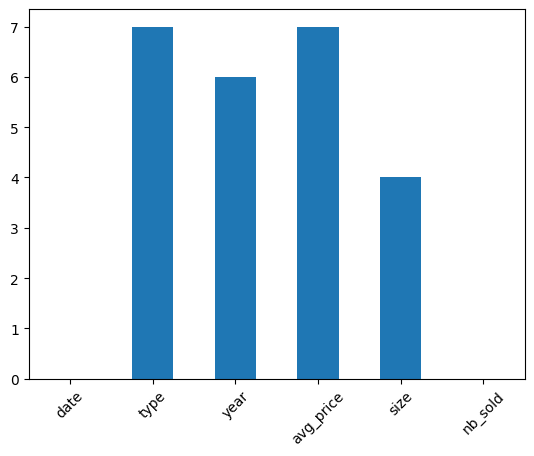

In [205]:
avocados_2016.isna().sum().plot(kind="bar", rot=45)
plt.show()

<a id="rm-mis-vals"></a>
## 2.2 Removing missing values
Now that you know there are some missing values in your DataFrame, you have a few options to deal with them. One way is to remove them from the dataset completely. In this exercise, you'll remove missing values by removing all rows that contain missing values.

Remove the rows of avocados_2016 that contain missing values and store the remaining rows in avocados_complete.

In [218]:
avocados_complete = avocados_2016.dropna()

Verify that all missing values have been removed from avocados_complete. Calculate each column that has NAs and print.

In [219]:
avocados_complete.isna().any()

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool

<a id="rp-mis-vals"></a>
## 2.3 Replacing missing values
Another way of handling missing values is to replace them all with the same value. For numerical variables, one option is to replace values with 0— you'll do this here. However, when you replace missing values, you make assumptions about what a missing value means. In this case, you will assume that a missing number sold means that no sales for that avocado type were made that week.

In this exercise, you'll see how replacing missing values can affect the distribution of a variable using histograms. You can plot histograms for multiple variables at a time as follows:

dogs[["height_cm", "weight_kg"]].hist()

A list has been created, cols_with_missing, containing the names of columns with missing values: "small_sold", "large_sold", and "xl_sold".

In [227]:
avocados_2016 = pd.read_csv("./../../data/avocados_new.csv", index_col=0)
# List the columns with missing values
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]

,date,avg_price,total_sold,small_sold,large_sold,xl_sold,total_bags_sold,small_bags_sold,large_bags_sold,xl_bags_sold
0,2016-12-25,1.00,30287853.70,9255125.20,10282925.61,541972.42,10207830.47,7709584.33,2417144.92,81101.22
1,2016-12-18,0.96,29583882.61,9394065.91,10339168.20,427872.42,9422776.08,6970320.34,2358443.96,94011.78
2,2016-12-11,0.98,30093540.70,9009996.11,NaN,403047.93,10713276.64,8149438.75,2490495.07,73342.82
3,2016-12-04,1.00,31621221.90,11043350.90,9908982.97,428009.84,10240878.19,7187022.58,2988504.98,65350.63
4,2016-11-27,1.21,22923062.65,7891487.94,7337341.77,NaN,7349757.04,5691266.56,1609867.20,48623.28
5,2016-11-20,1.27,24989702.75,NaN,8033510.82,407567.78,8017463.63,6207080.46,1765673.77,44709.40
6,2016-11-13,1.36,24075126.49,8235135.43,7759608.21,477520.95,7602861.90,5602593.66,1957163.93,43104.31
7,2016-11-06,1.44,22534698.38,7804252.91,NaN,505349.44,7098159.72,5245066.66,1812174.32,40918.74
8,2016-10-30,1.43,21009730.21,7100458.82,6852046.35,453145.26,6604079.78,4655045.62,1882750.65,66283.51
9,2016-10-23,1.34,24753513.95,7579629.06,8104522.26,452383.96,8616978.67,6508666.81,2016513.03,91798.83


Create a histogram of those columns.

array([[<Axes: title={'center': 'small_sold'}>,
        <Axes: title={'center': 'large_sold'}>],
       [<Axes: title={'center': 'xl_sold'}>, <Axes: >]], dtype=object)

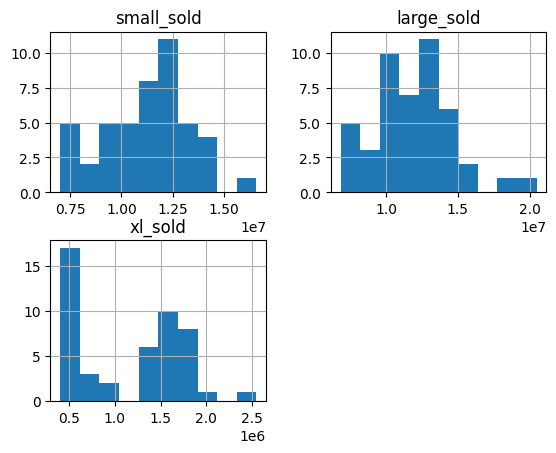

In [230]:
avocados_2016[cols_with_missing].hist()

Show the plot.

In [231]:
plt.show()

Replace the missing values of avocados_2016 with 0s and store the result as avocados_filled.

In [232]:
avocados_filled = avocados_2016.fillna(0)

Create a histogram of the cols_with_missing columns of avocados_filled.

array([[<Axes: title={'center': 'small_sold'}>,
        <Axes: title={'center': 'large_sold'}>],
       [<Axes: title={'center': 'xl_sold'}>, <Axes: >]], dtype=object)

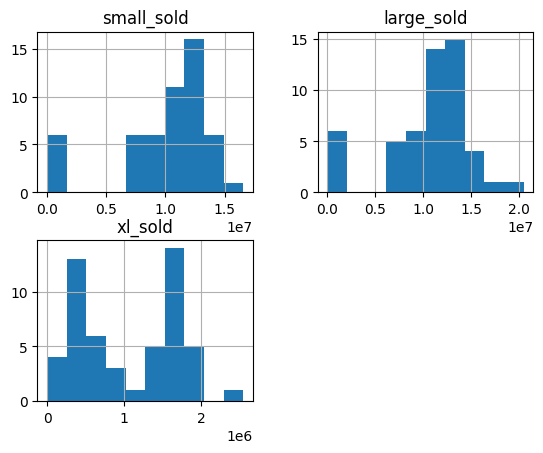

In [235]:
avocados_filled[cols_with_missing].hist()

<a id="crt-df"></a>
# 3 Creating DataFrames
<div align="middle">
<video width="60%" controls>
      <source src="./../../res/videos/4.creating-visualizing-dataframes/3.creating_dataframes.mp4" type="video/mp4">
</video></div>

<a id="ls-dic"></a>
## 3.1 List of dictionaries
You recently got some new avocado data from 2019 that you'd like to put in a DataFrame using the list of dictionaries method. Remember that with this method, you go through the data row by row.

|date|	small_sold|	large_sold|
|---|---|---|
|"2019-11-03"|	10376832|	7835071|
|"2019-11-10"|	10717154|	8561348|

Create a list of dictionaries with the new data called avocados_list.

In [264]:
avocados_list = [
    {"date":"2019-11-03", "small_sold":10376832, "large_sold":7835071},
    {"date":"2019-11-10", "small_sold":10717154, "large_sold":8561348},
]

Convert the list into a DataFrame called avocados_2019.

In [248]:
avocados_2019 = pd.DataFrame(avocados_list)

Print your new DataFrame.

In [250]:
avocados_2019

,date,small_sold,large_sold
0,2019-11-03,103768632,7835071
1,2019-11-10,10717154,8561348


<a id="dic-ls"></a>
## 3.2 Dictionary of lists
Some more data just came in! This time, you'll use the dictionary of lists method, parsing the data column by column.

|date|	small_sold|	large_sold|
|-|-|-|
|"2019-11-17"|	10859987|	7674135|
|"2019-12-01"|	9291631|	6238096|

Create a dictionary of lists with the new data called avocados_dict.

In [265]:
avocados_dict = {
    "date": ["2019-11-17", "2019-12-01"],
    "small_sold": [10859987, 9291631],
    "large_sold": [7674135, 6238096],
}

Convert the dictionary to a DataFrame called avocados_2019.

In [266]:
avocados_2019 = pd.DataFrame(avocados_dict)

Print your new DataFrame.

In [267]:
avocados_2019

,date,small_sold,large_sold
0,2019-11-17,10859987,7674135
1,2019-12-01,9291631,6238096


<a id="rw-df"></a>
# 4 Reading and writing DataFrames
<div align="middle">
<video width="60%" controls>
      <source src="./../../res/videos/4.creating-visualizing-dataframes/4.reading_and_writing_csvs.mp4" type="video/mp4">
</video></div>

<a id="csv-df"></a>
## 4.1 CSV to DataFrame
You work for an airline, and your manager has asked you to do a competitive analysis and see how often passengers flying on other airlines are involuntarily bumped from their flights. You got a CSV file (airline_bumping.csv) from the Department of Transportation containing data on passengers that were involuntarily denied boarding in 2016 and 2017, but it doesn't have the exact numbers you want. In order to figure this out, you'll need to get the CSV into a pandas DataFrame and do some manipulation!

pandas is imported for you as pd. "airline_bumping.csv" is in your working directory.

Read the CSV file "airline_bumping.csv" and store it as a DataFrame called airline_bumping.

In [271]:
airline_bumping = pd.read_csv("./../../data/airline_bumping.csv", index_col=0)

Print the first few rows of airline_bumping.

In [274]:
airline_bumping.head()

,year,nb_bumped,total_passengers
airline,,,
DELTA AIR LINES,2017,679,99796155
VIRGIN AMERICA,2017,165,6090029
JETBLUE AIRWAYS,2017,1475,27255038
UNITED AIRLINES,2017,2067,70030765
HAWAIIAN AIRLINES,2017,92,8422734


For each airline group, select the nb_bumped, and total_passengers columns, and calculate the sum (for both years). Store this as airline_totals.

In [288]:
airline_totals = airline_bumping.groupby("airline")[["nb_bumped", "total_passengers"]].sum()
airline_totals

,nb_bumped,total_passengers
airline,,
ALASKA AIRLINES,1392,36543121
AMERICAN AIRLINES,11115,197365225
DELTA AIR LINES,1591,197033215
EXPRESSJET AIRLINES,3326,27858678
FRONTIER AIRLINES,1228,22954995
HAWAIIAN AIRLINES,122,16577572
JETBLUE AIRWAYS,3615,53245866
SKYWEST AIRLINES,3094,47091737
SOUTHWEST AIRLINES,18585,228142036


Create a new column of airline_totals called bumps_per_10k, which is the number of passengers bumped per 10,000 passengers in 2016 and 2017.

In [289]:
airline_totals["bumps_per_10k"] = (airline_totals["nb_bumped"]/airline_totals["total_passengers"]) * 10_000

airline_totals

,nb_bumped,total_passengers,bumps_per_10k
airline,,,
ALASKA AIRLINES,1392,36543121,0.380920
AMERICAN AIRLINES,11115,197365225,0.563169
DELTA AIR LINES,1591,197033215,0.080748
EXPRESSJET AIRLINES,3326,27858678,1.193883
FRONTIER AIRLINES,1228,22954995,0.534960
HAWAIIAN AIRLINES,122,16577572,0.073593
JETBLUE AIRWAYS,3615,53245866,0.678926
SKYWEST AIRLINES,3094,47091737,0.657015
SOUTHWEST AIRLINES,18585,228142036,0.814624


<a id="df-csv"></a>
## 4.2 DataFrame to CSV
You're almost there! To make things easier to read, you'll need to sort the data and export it to CSV so that your colleagues can read it.

Sort airline_totals by the values of bumps_per_10k from highest to lowest, storing as airline_totals_sorted.

In [291]:
airline_totals_sorted = airline_totals.sort_values(by="bumps_per_10k", ascending=False)

Print your sorted DataFrame.

In [292]:
airline_totals_sorted

,nb_bumped,total_passengers,bumps_per_10k
airline,,,
EXPRESSJET AIRLINES,3326,27858678,1.193883
SPIRIT AIRLINES,2920,32304571,0.903897
SOUTHWEST AIRLINES,18585,228142036,0.814624
JETBLUE AIRWAYS,3615,53245866,0.678926
SKYWEST AIRLINES,3094,47091737,0.657015
AMERICAN AIRLINES,11115,197365225,0.563169
FRONTIER AIRLINES,1228,22954995,0.534960
ALASKA AIRLINES,1392,36543121,0.380920
UNITED AIRLINES,4941,134468897,0.367446


Save the sorted DataFrame as a CSV called "airline_totals_sorted.csv".

In [294]:
airline_totals_sorted.to_csv("./../../data/out/airline_totals_sorted.csv")

# Wrap up
<div align="middle">
<video width="60%" controls>
      <source src="./../../res/videos/4.creating-visualizing-dataframes/wrap_up.mp4" type="video/mp4">
</video></div>

## More to learn
- Joining Data with pandas
- Streamlined Data Ingestion with pandas